In [69]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import load, CellPlot
from colicoords.minimizers import *
import time

This example notebook will go over the different input data classes that can be used as well as their objective functions that are minimized in order to optimize the coordinate system for this given data class. 

The fitting of the coordinate system to the data is internally handled by `symfit` which allows for the custom models to be fitted by `scipy.minimize` through a pythonic and easy to use API. All `symfit` minimizers are available through importing from `colicoords.minimizers`.

## Optimization by binary images

Optimization by the binary image is the default optimization process in `ColiCoords`. The binary optimization process is the easiest to calculate and therefore the fastest, but the accuracy of the method is limited. We will load the set of cells from example two which were saved before optimizing them. Therefore the parameters of their coordinate system are the initial guesses.

In [25]:
cells = load('data/04_cells_pre_optimization.hdf5')

In [26]:
cell = cells[0]
cp = CellPlot(cell)

The optimization process is for a data classes based on calculating some values or image based on the current coordinate system and then comparing this to the measured data by calculating the chi-squared. More information on the implementation of this process can be found in the optimization section of the docs. 

The following figure demonstrates how the optimization process works:

<IPython.core.display.Javascript object>


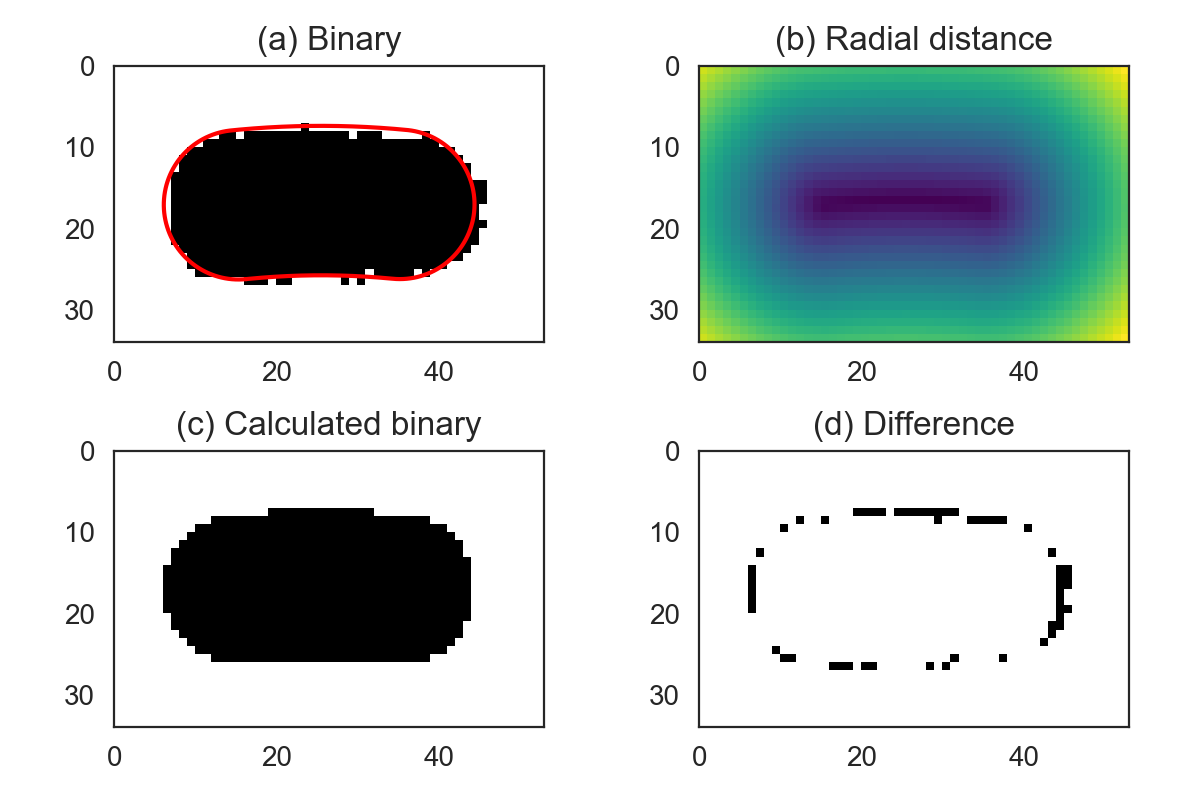

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(6,4))
cp.imshow('binary', ax=axes[0, 0])
cp.plot_outline(ax=axes[0, 0])
axes[0, 0].set_title('(a) Binary')

cp.imshow(cell.coords.rc, ax=axes[0, 1], cmap='viridis')
axes[0, 1].set_title('(b) Radial distance')

cp.imshow(cell.coords.rc < cell.coords.r, ax=axes[1, 0], cmap='gray_r')
axes[1, 0].set_title('(c) Calculated binary')


difference = ((cell.coords.rc < cell.coords.r) - cell.data.binary_img)**2
cp.imshow(difference)
axes[1, 1].set_title('(d) Difference')

plt.tight_layout()

In figure (a) the measured binary is shown together with the outline of the inital guess coordinate system. To now optimize the coordinate system based on the binary image, a new binary image is calculated by thresholding the radial distance map (b) with the current radius of the cell resulting in a new binary image (c). The difference between the calculated and binary is shown in panel (d). The sum of the difference image is the chi-squared and is minimized by `symfit`, and in the process the parameters are found such that the coordinate system best describes the binary image.

In [63]:
float(np.sum(difference))

57.0

By summing the difference image we find that the current chi-squared value is 57. In case of binary images, this means that there are 57 pixels that do not match. In the cell below we make a copy of the cell object and then optimize the new cell object to reduce this mismatch.

In [53]:
cell_opt = cell.copy()
res = cell_opt.optimize()
cp_opt = CellPlot(cell_opt)
res.objective_value

array(30.)

<IPython.core.display.Javascript object>


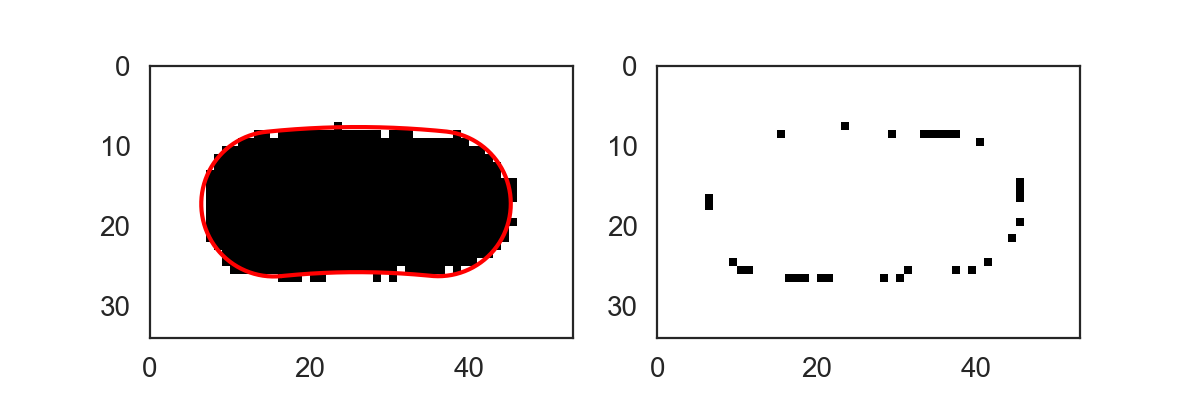

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(6,2))
cp_opt.imshow('binary', ax=axes[0])
cp_opt.plot_outline(ax=axes[0])

difference = ((cell_opt.coords.rc < cell_opt.coords.r) - cell_opt.data.binary_img)**2
cp_opt.imshow(difference, ax=axes[1])

The coordinate system describes the cell now much better. The default minimizer used in the fitting process is the [`Powell`](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-powell.html) minimizer. Although this minimizer is fast is does not always find the global minimum. To further improve the result, global minimizers supported by `symfit` can be used. 

The `DifferentialEvolution` algoritm is able to search large parameter spaces to find the global minimum of the problem. The implementation used is stochastic in nature and is therefore not guaranteed to return the same minimum on every run. 

In [71]:
cell_opt = cell.copy()
t0 = time.time()
res = cell_opt.optimize(minimizer=DifferentialEvolution)
t1 = time.time()

print(f"The cell was optimized in {int(t1-t0)} seconds")
res.objective_value

The cell was optimized in 85 seconds


24.0

<IPython.core.display.Javascript object>


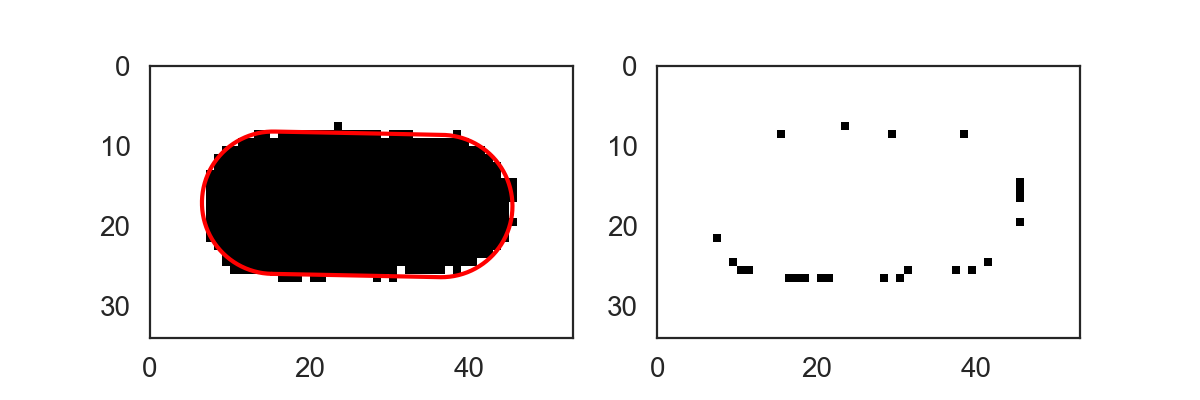

In [67]:
cp_opt = CellPlot(cell_opt)
fig, axes = plt.subplots(1, 2, figsize=(6,2))
cp_opt.imshow('binary', ax=axes[0])
cp_opt.plot_outline(ax=axes[0])

difference = ((cell_opt.coords.rc < cell_opt.coords.r) - cell_opt.data.binary_img)**2
cp_opt.imshow(difference, ax=axes[1])

## Optimization by brightfield images
blab lba

<IPython.core.display.Javascript object>


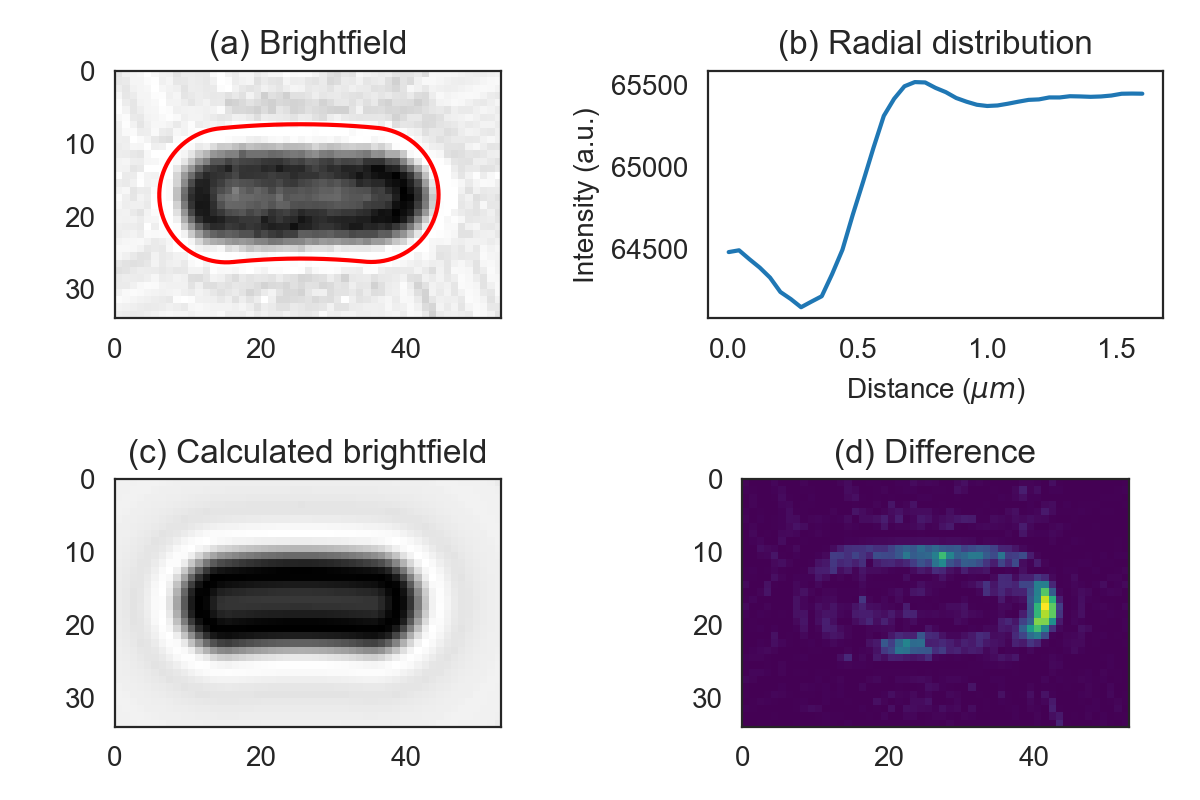

25788605.54275663

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(6,4))
cp.imshow('brightfield', ax=axes[0, 0])
cp.plot_outline(ax=axes[0, 0])
axes[0, 0].set_title('(a) Brightfield')

cp.plot_r_dist(data_name='brightfield', ax=axes[0, 1])
axes[0, 1].set_title('(b) Radial distribution')

img = cell.reconstruct_cell('brightfield')
cp.imshow(img, ax=axes[1, 0], cmap='gray')
axes[1, 0].set_title('(c) Calculated brightfield')


difference = (img - cell.data.data_dict['brightfield'])**2
cp.imshow(difference, cmap='viridis')
axes[1, 1].set_title('(d) Difference')
plt.tight_layout()

float(np.sum(difference))

In [86]:
cell_opt = cell.copy()
res = cell_opt.optimize('brightfield')
cp_opt = CellPlot(cell_opt)
res.objective_value

array(10016887.12381686)

<IPython.core.display.Javascript object>


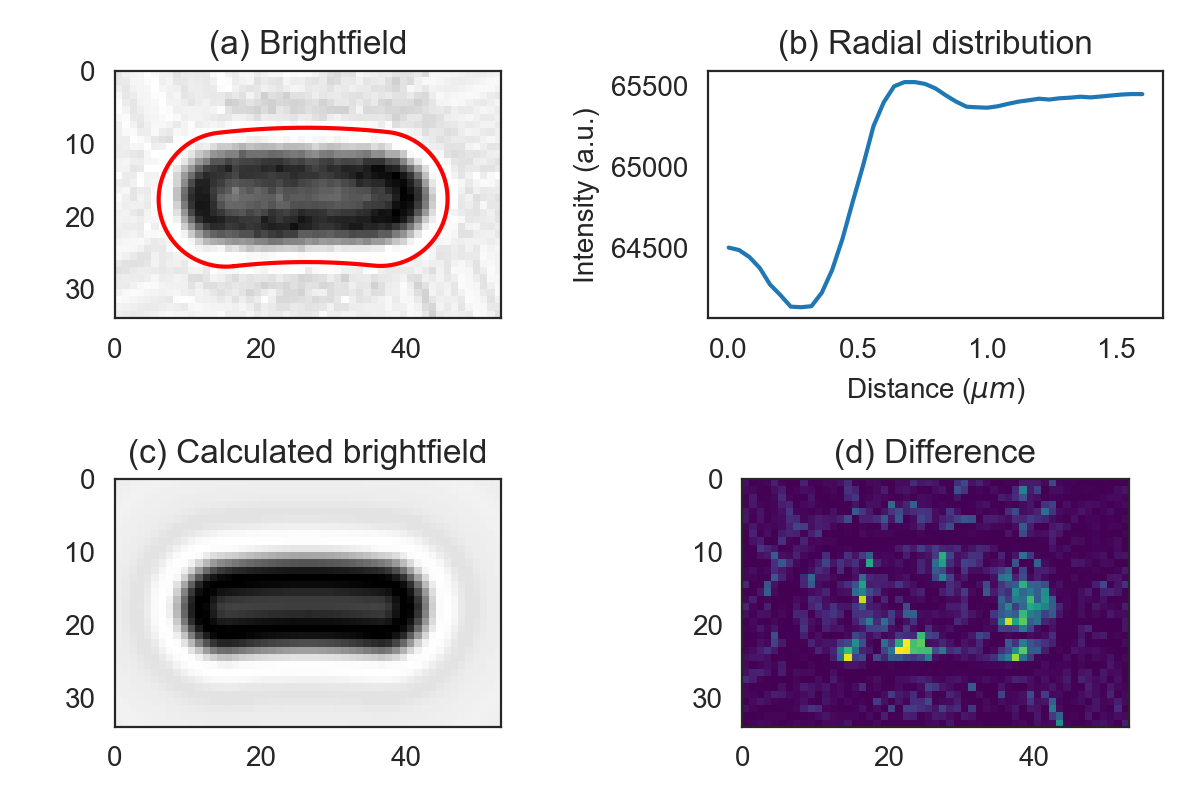

9780823.64358179

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(6,4))
cp_opt.imshow('brightfield', ax=axes[0, 0])
cp_opt.plot_outline(ax=axes[0, 0])
axes[0, 0].set_title('(a) Brightfield')

cp_opt.plot_r_dist(data_name='brightfield', ax=axes[0, 1])
axes[0, 1].set_title('(b) Radial distribution')

img = cell_opt.reconstruct_cell('brightfield')
cp_opt.imshow(img, ax=axes[1, 0], cmap='gray')
axes[1, 0].set_title('(c) Calculated brightfield')


difference = (img - cell_opt.data.data_dict['brightfield'])**2
cp_opt.imshow(difference, cmap='viridis')
axes[1, 1].set_title('(d) Difference')
plt.tight_layout()

float(np.sum(difference))

<IPython.core.display.Javascript object>


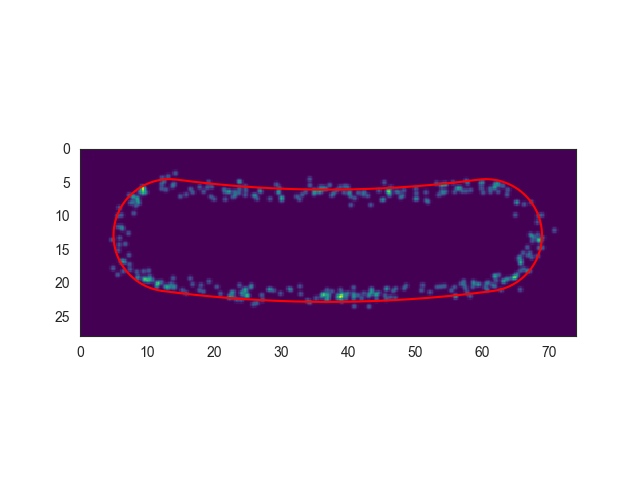

In [4]:
plt.figure()
cp.plot_storm(method='gauss')
cp.plot_outline()

<IPython.core.display.Javascript object>


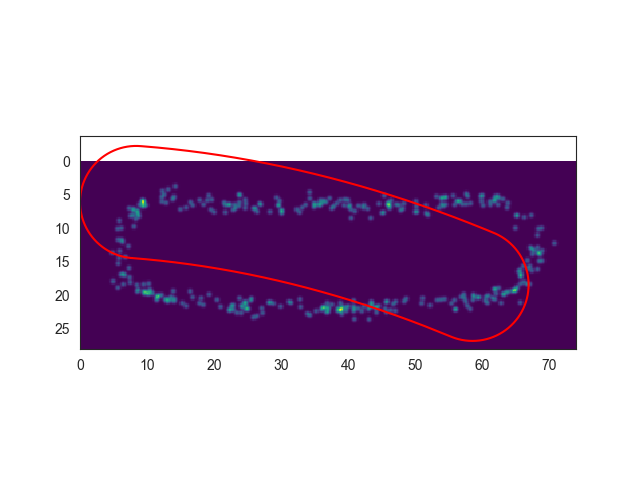

In [22]:
c2 = cell.copy()
c2.coords.xl -= 5
c2.coords.xr -= 2
c2.coords.a0 -= 5
c2.coords.a1 *= 0.1
c2.coords.a2 *= -1.2

cp2 = CellPlot(c2)
plt.figure()
cp2.plot_storm(method='gauss')
cp2.plot_outline()

In [18]:
res = c2.optimize('storm', minimizer=DifferentialEvolution)

In [19]:
print(res.objective_value)

215.3620355903049


In [20]:
print(res)


Parameter Value        Standard Deviation
a0        1.122929e+01 None
a1        1.698805e-01 None
a2        -2.322408e-03 None
r         7.472455e+00 None
xl        1.304786e+01 None
xr        6.066923e+01 None
Fitting status message: Optimization terminated successfully.
Number of iterations:   24480
Regression Coefficient: -inf



<IPython.core.display.Javascript object>


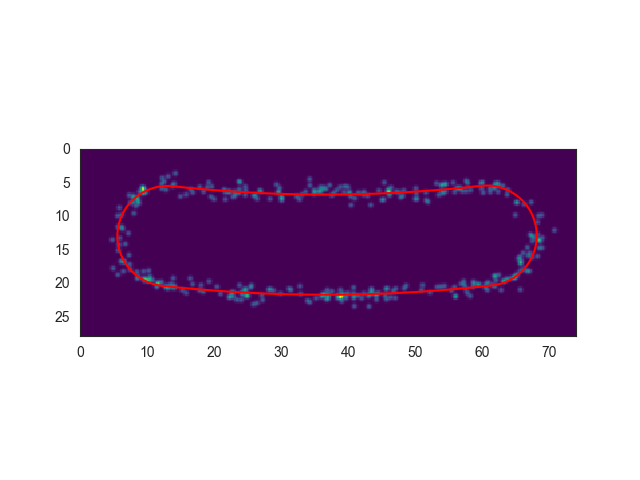

In [21]:
plt.figure()
cp2.plot_storm(method='gauss')
cp2.plot_outline()


In [ ]:
# Manually interacting with CellFit